## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Clicked Ads Dataset.csv')
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Daily Time Spent on Site,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
Area Income,432837300.0,479092950.0,418501580.0,383643260.0,517229930.0
Daily Internet Usage,256.09,193.77,236.5,245.89,225.58
Male,Perempuan,Laki-Laki,Perempuan,Laki-Laki,Perempuan
Timestamp,3/27/2016 0:53,4/4/2016 1:39,3/13/2016 20:35,1/10/2016 2:31,6/3/2016 3:36
Clicked on Ad,No,No,No,No,No
city,Jakarta Timur,Denpasar,Surabaya,Batam,Medan
province,Daerah Khusus Ibukota Jakarta,Bali,Jawa Timur,Kepulauan Riau,Sumatra Utara


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB




*   Data terdiri dari 1000 baris.
*   Beberapa kolom memiliki missing value.




In [ ]:
#drop kolom unnamed karna tidak diperlukan
df.drop(columns = ['Unnamed: 0'], inplace = True)

## **Statistikal** **Summary**

In [ ]:
cats = df.select_dtypes(include = 'object')
nums = df.select_dtypes(exclude = 'object')
cats_cols = cats.columns.to_list()
nums_cols = nums.columns.to_list()
print('Data category: ',cats_cols)
print('Data numerik: ',nums_cols)

Data category:  ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']
Data numerik:  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [ ]:
df[cats_cols].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


*  Feature Male didominasi oleh label perempuan, yaitu sebanyak 518 dari 997
*  Feature Timestamp tipe datanya dapat diubah dari object menjadi datetime untuk mempermudah analisis
*  Feature Clicked on Ad memiliki jumlah yang seimbang antara label No dengan label Yes
*  Feature city didominasi oleh Surabaya
*  Feature province didominasi oleh Daerah Khusus Ibukota Jakarta
*  Feature category didominasi oleh Otomotif

In [ ]:
df[nums_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


*   Feature Daily Time Spent on Site distribusinya skewed
*   Feature Age distribusinya tampak mendekati normal
*   Feature Area Income distribusinya tampak skewed
*   Feature Daily Internet Usage distribusinya tampak mendekati normal.

In [ ]:
for i in cats_cols:
    print('---'*10)
    print(i)
    print(df[i].value_counts())

------------------------------
Male
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
------------------------------
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
------------------------------
Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               

Feature Engineering

In [ ]:
df.Timestamp.dtype

dtype('O')

In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp)

In [ ]:
df.Timestamp.dtype

dtype('<M8[ns]')

In [ ]:
df['month'] = df.Timestamp.dt.month
df.month.unique()

array([3, 4, 1, 6, 5, 7, 2])

In [ ]:
df.head().T

,0,1,2,3,4
Daily Time Spent on Site,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
Area Income,432837300.0,479092950.0,418501580.0,383643260.0,517229930.0
Daily Internet Usage,256.09,193.77,236.5,245.89,225.58
Male,Perempuan,Laki-Laki,Perempuan,Laki-Laki,Perempuan
Timestamp,2016-03-27 00:53:00,2016-04-04 01:39:00,2016-03-13 20:35:00,2016-01-10 02:31:00,2016-06-03 03:36:00
Clicked on Ad,No,No,No,No,No
city,Jakarta Timur,Denpasar,Surabaya,Batam,Medan
province,Daerah Khusus Ibukota Jakarta,Bali,Jawa Timur,Kepulauan Riau,Sumatra Utara
category,Furniture,Food,Electronic,House,Finance


## **Univariate Analisis**




Numerical Feature

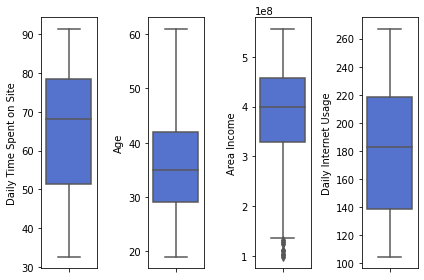

In [ ]:
features = nums_cols
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='royalblue', orient='v')
    plt.tight_layout()



*   Area Income memiliki outlier
*   Feature Daily Time Spent on Site, Age, Area Income dan Daily Internet Usage memiliki distibusi skew


In [ ]:
num_cols2 = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']

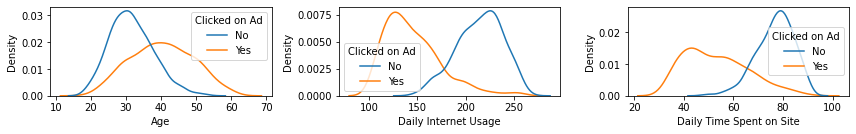

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(num_cols2)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[num_cols2[i]],hue=df['Clicked on Ad'])
    plt.xlabel(num_cols2[i])
    plt.tight_layout()

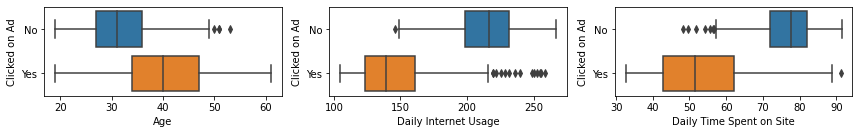

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(num_cols2)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[num_cols2[i]],y=df['Clicked on Ad'])
    plt.xlabel(num_cols2[i])
    plt.tight_layout()

* User yang mengklik Ads adalah user dengan Daily Time Spend on Site sekitar 40-45 menit. Sedangkan, user yang tidak mengklik Ads adalah user dengan Daily Time Spend on Site sekitar 75-80 menit.
* User yang mengklik Ads rata-rata ada pada usia(Age) 40 tahun. Sedangkan, user yang tidak mengklik Ads sebagian besar ada pada usia(Age) 30 tahun.
* User dengan Daily Internet Usage sekitar 100-150 cenderung mengklik Ads. Sedangkan, user dengan Daily Internet Usage sekitar 200-250 cenderung tidak mengklik Ads.

Categorical Features

In [ ]:
cats_col2 = ['Male','month','Clicked on Ad','city', 'province', 'category']

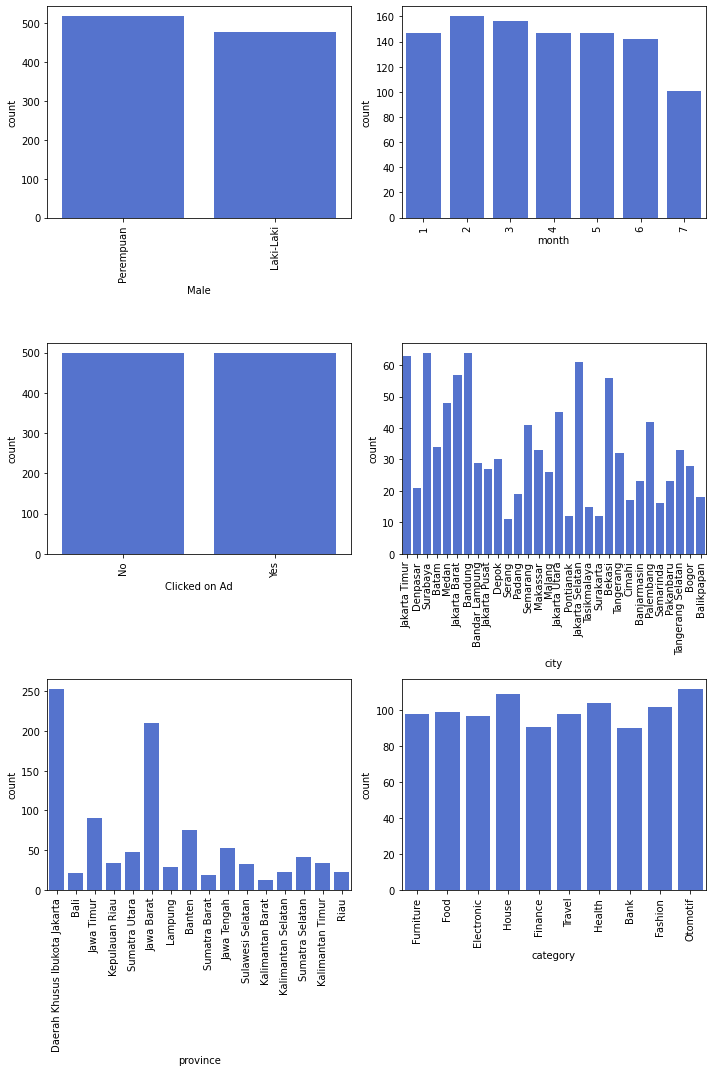

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats_col2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats_col2[i]],color='royalblue')
    plt.xlabel(cats_col2[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

* Feature Male didominasi oleh perempuan
* Feature month didominasi oleh bulan februari/2
* Feature Clicked on Ad memiliki jumlah yang seimbang antara label yes dan label no
* Feature city didominasi oleh kota Surabaya dan Bandung
* Feature province didominasi oleh Daerah Khusus Ibu Kota Jakarta
* Feature category didominasi oleh otomotif,dimana banyak yang berminat untuk melihat iklan ototmotif


# Bivariate Analisis

Numerical Feature

<Figure size 720x720 with 0 Axes>

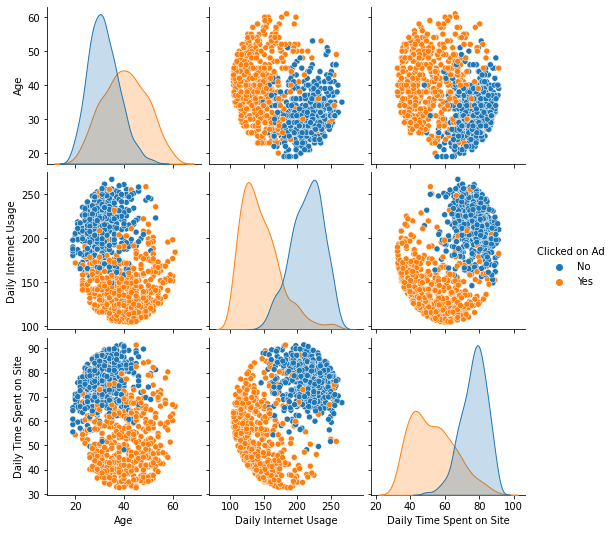

In [ ]:
plt.figure(figsize = (10,10))
sns.pairplot(df[['Age','Daily Internet Usage','Daily Time Spent on Site','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

* Semakin tua usia (Age) user serta semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang user cenderung mengklik Ads.
* Semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang user cenderung mengklik Ads.

Categorical Feature

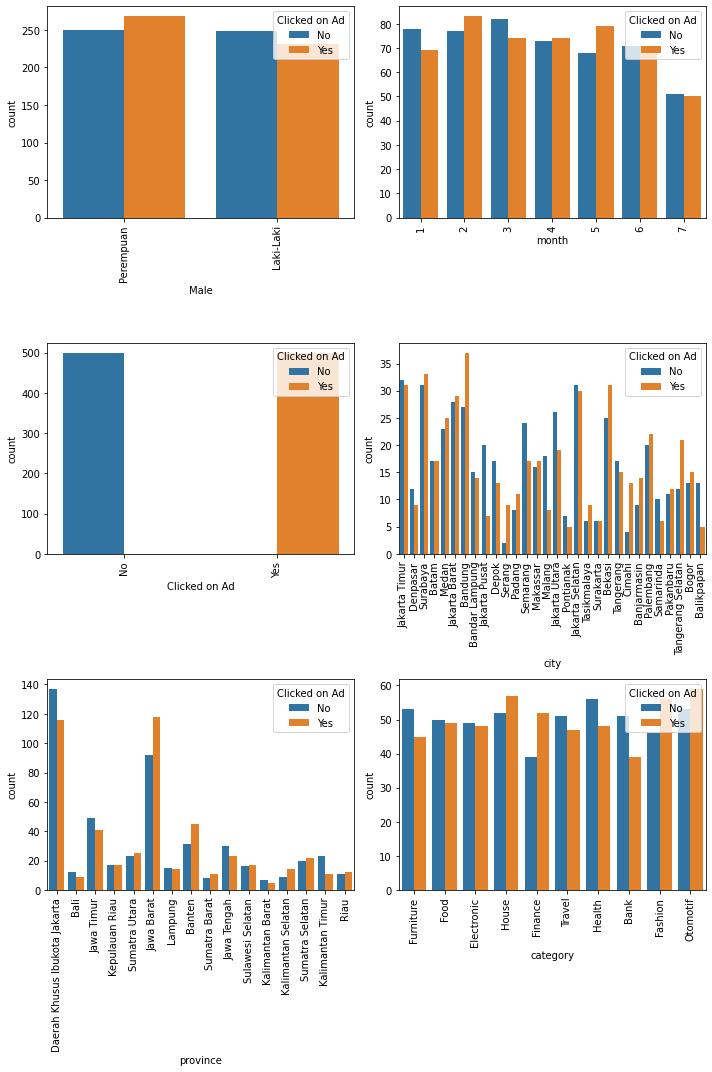

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats_col2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats_col2[i]], hue=df['Clicked on Ad'])
    plt.xlabel(cats_col2[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

* Pada feature Male, user perempuan lebih banyak mengclick Ads dibandingkan user laki-laki
* Bulan 2 / Februari menjadi bulan terbanyak untuk user mengclick ads yang diberikan
* Kota Bandung menjadi jumlah user terbanyak yang mengclik ads
* User di Provinsi Jawa Barat cenderung untuk mengclick ads yang diberikan, sementara DKI Jakarta lebih banyak menghiraukan ads
* Category iklan otomotif cenderung lebih banyak untuk diclick,disusul Fashion, dan House.Sementara category Health memiliki jumlah tertinggi untuk tidak diclick Ads

## **Multivariate Analisis**

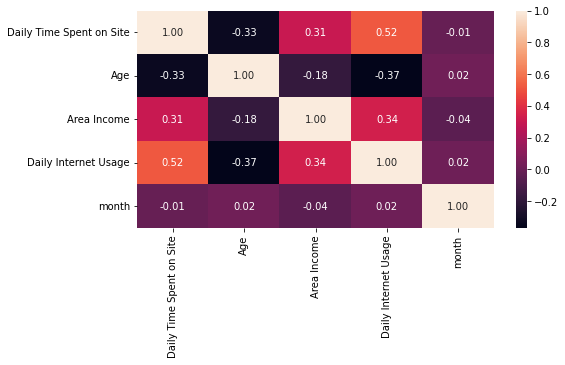

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

* Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage.
* Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage.
* Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age.

# Data Cleaning dan Data Processing

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month'],
      dtype='object')

## Check Missing Value

In [ ]:
df_clean.isnull().sum().sort_values(ascending = False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
month                        0
dtype: int64

In [ ]:
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
month                       0
dtype: int64

Pada feature numerik nilai yang kosong diisi dengan nlai median dari masing-masing feature karena distribusi data cenderung skewed.


In [ ]:
df_clean['Male'].fillna('Perempuan',inplace = True)
df_clean.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
month                       0
dtype: int64

Pada feature kategorik yaitu male nilai kosong diisi dengan modus dari feature tersebut yaitu perempuan.

## Check Dulicated Data

In [ ]:
df_clean.duplicated().sum()

0

dataset tidak memiliki duplikat data

## Feature Enginering : feature Timestamp

In [ ]:
df_clean['year']=df_clean.Timestamp.dt.year
df_clean['month']=df_clean.Timestamp.dt.month
df_clean['week']=df_clean.Timestamp.dt.isocalendar().week
df_clean['day']=df_clean.Timestamp.dt.day

In [ ]:
print(df_clean.year.dtype)
print(df_clean.month.dtype)
print(df_clean.week.dtype)
print(df_clean.day.dtype)

int64
int64
UInt32
int64


In [ ]:
df_clean.week = df_clean.week.astype('int64')

In [ ]:
df_clean.head().T

,0,1,2,3,4
Daily Time Spent on Site,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
Area Income,432837300.0,479092950.0,418501580.0,383643260.0,517229930.0
Daily Internet Usage,256.09,193.77,236.5,245.89,225.58
Male,Perempuan,Laki-Laki,Perempuan,Laki-Laki,Perempuan
Timestamp,2016-03-27 00:53:00,2016-04-04 01:39:00,2016-03-13 20:35:00,2016-01-10 02:31:00,2016-06-03 03:36:00
Clicked on Ad,No,No,No,No,No
city,Jakarta Timur,Denpasar,Surabaya,Batam,Medan
province,Daerah Khusus Ibukota Jakarta,Bali,Jawa Timur,Kepulauan Riau,Sumatra Utara
category,Furniture,Food,Electronic,House,Finance


In [ ]:
#ubah isi data agar tidak kepanjangan
df_clean.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

In [ ]:
df_cleaned = df_clean.copy()

## Feature Encoding

In [ ]:
df_encode = df_cleaned.copy()

In [ ]:
df_encode.Male.unique()

array(['Perempuan', 'Laki-Laki'], dtype=object)

In [ ]:
#mengubah label Laki-Laki menjadi 1 dan label perempuan menjadi 0
df_encode['Male'] = np.where(df_encode['Male']=='Laki-Laki',1,0)

#check label
df_encode.Male.unique()

array([0, 1])

In [ ]:
df_encode['Clicked on Ad'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#mengubah label Yes menjadi 1 dan label No menjadi 0
df_encode['Clicked on Ad'] = np.where(df_encode['Clicked on Ad']=='Yes',1,0)

#check label
df_encode['Clicked on Ad'].unique()

array([0, 1])

In [ ]:
# One Hot Encoding
ohe_cols = ['province','category']

In [ ]:
for cat in ohe_cols:
    onehots = pd.get_dummies(df_encode[cat],prefix = cat)
    df_encode = df_encode.join(onehots)

In [ ]:
df_encode.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month', 'year', 'week', 'day', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

Drop kolom yang telah dilakukan feature encoding dan feature extraction

In [ ]:
df_encode = df_encode.drop(columns = ['Timestamp','province','category'])
df_encode

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,month,year,week,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,3,2016,12,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,Denpasar,4,2016,14,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,Surabaya,3,2016,10,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,Batam,1,2016,1,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,Medan,6,2016,22,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,1,Semarang,2,2016,6,...,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,1,Pakanbaru,4,2016,16,...,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,1,1,Samarinda,2,2016,5,...,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,0,0,Tangerang,3,2016,12,...,1,0,0,0,0,0,0,0,0,0


Drop fitur year karena hanya memiliki 1 unique value saja dan fitur city memiliki jumlah unique value yang terlalu banyak dan sudah digantikan dengan province

In [ ]:
df_encode = df_encode.drop(columns = ['year','city'])
df_encode

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month,week,day,province_Bali,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,3,12,27,0,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,4,14,4,1,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,3,10,13,0,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,1,1,10,0,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,6,22,3,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,1,2,6,11,0,...,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,1,4,16,22,0,...,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,1,1,2,5,1,0,...,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,0,0,3,12,24,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = df_encode.copy()

In [ ]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,6.497087e+01,1.574539e+01,32.60,5.154500e+01,6.811000e+01,7.835250e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,1000.0,3.850493e+08,9.347971e+07,97975500.00,3.298201e+08,3.990683e+08,4.566932e+08,5.563936e+08
Daily Internet Usage,1000.0,1.798943e+02,4.362892e+01,104.78,1.390175e+02,1.826500e+02,2.182875e+02,2.670100e+02
Male,1000.0,4.790000e-01,4.998088e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Clicked on Ad,1000.0,5.000000e-01,5.002502e-01,0.00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
month,1000.0,3.817000e+00,1.926973e+00,1.00,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
week,1000.0,1.541700e+01,9.713159e+00,1.00,8.000000e+00,1.500000e+01,2.200000e+01,5.300000e+01
day,1000.0,1.548400e+01,8.734073e+00,1.00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
province_Bali,1000.0,2.100000e-02,1.434558e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## Split Feature and target

In [ ]:
df_model = df_encoded.copy()

In [ ]:
df_model['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [ ]:
X = df_model.drop(columns = ['Clicked on Ad'])
y = df_model['Clicked on Ad']

Tidak handle imbalance data karena jumlah sudah seimbang


# **Modeling**

## Experiment 1 - Sebelum Normalisasi dan standarisasi

In [ ]:
#Split train 70% dan test 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Split into 70:30
Total rows & column of train set: (700, 34)
Total rows & column of test set: (300, 34)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    500
1    500
Name: Clicked on Ad, dtype: int64


UNDERSAMPLING
0    346
1    346
Name: Clicked on Ad, dtype: int64


OVERSAMPLING
0    354
1    354
Name: Clicked on Ad, dtype: int64


SMOTE
0    354
1    354
Name: Clicked on Ad, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

K-Nearest Neighbor





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_over_SMOTE, y_over_SMOTE)

# Prediction & Evaluation
y_pred = knn.predict(X_test)
eval_classification(knn, y_pred, X_over_SMOTE, X_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.70
Recall (Test Set): 0.64
F1-Score (Test Set): 0.67
AUC: 0.67


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[103,  55],
       [ 43,  99]])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.74
Recall (Test Set): 0.62
F1-Score (Test Set): 0.68
AUC: 0.70


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[113,  58],
       [ 33,  96]])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = DT.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[136,  11],
       [ 10, 143]])

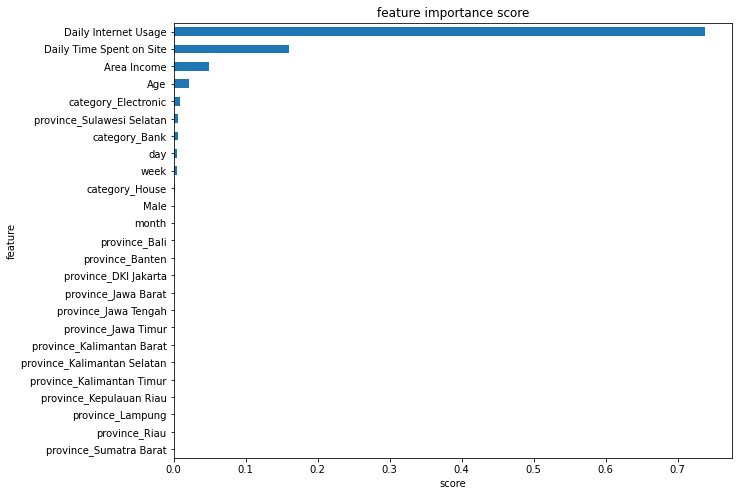

In [ ]:
show_feature_importance(DT)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[139,   8],
       [  7, 146]])

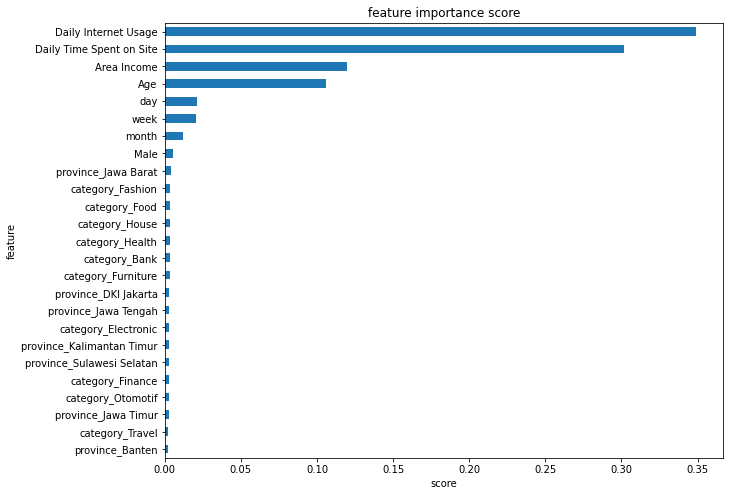

In [ ]:
show_feature_importance(rf)

XGBOOST

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[140,   9],
       [  6, 145]])

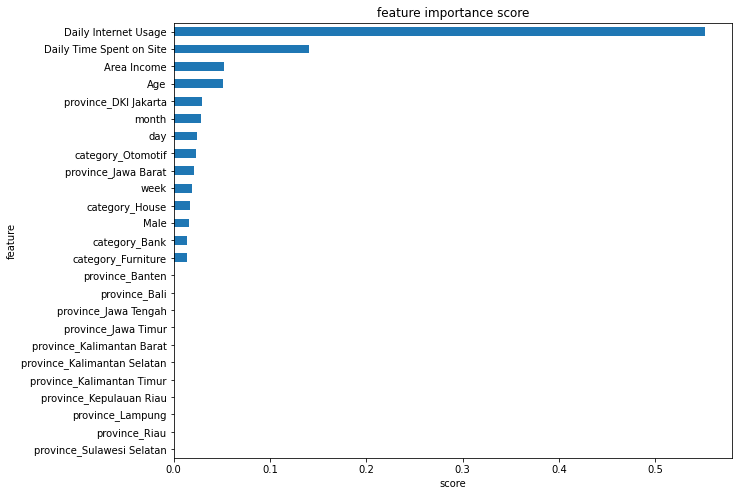

In [ ]:
show_feature_importance(xg)

## Experiment 2 - Setelah Normalisasi dan Standarisasi

In [ ]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,month,week,day,province_Bali,province_Banten,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,3,12,27,0,0,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,4,14,4,1,0,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,3,10,13,0,0,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,1,1,10,0,0,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,6,22,3,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,2,6,11,0,0,...,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,4,16,22,0,0,...,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,1,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,0,3,12,24,0,1,...,1,0,0,0,0,0,0,0,0,0


Fitur yang akan dilakukan Fitur transformation adalah Daily Time Spent On Site, Age, Area Income, Daily Internet Usage, year, day, month. Feature transformation yang dilakukan adalah STANDARISASI

In [ ]:
X_transform = X.copy()
y_transform = y.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_transform['Daily Time Spent on Site'] = StandardScaler().fit_transform(X_transform['Daily Time Spent on Site'].values.reshape(len(X), 1))
X_transform['Age'] = StandardScaler().fit_transform(X_transform['Age'].values.reshape(len(X), 1))
X_transform['Area Income'] = StandardScaler().fit_transform(X_transform['Area Income'].values.reshape(len(X), 1))
X_transform['Daily Internet Usage'] = StandardScaler().fit_transform(X_transform['Daily Internet Usage'].values.reshape(len(X), 1))
X_transform['month'] = StandardScaler().fit_transform(X_transform['month'].values.reshape(len(X), 1))
X_transform['week'] = StandardScaler().fit_transform(X_transform['week'].values.reshape(len(X), 1))
X_transform['day'] = StandardScaler().fit_transform(X_transform['day'].values.reshape(len(X), 1))

In [ ]:
X_transform.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,month,week,day,province_Bali,province_Banten,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0.252844,-0.114905,0.511468,1.747324,0,-0.424193,-0.351967,1.319174,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.969602,-0.570425,1.006536,0.318199,1,0.095015,-0.145958,-1.315508,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.285886,-1.139826,0.358035,1.298085,0,-0.424193,-0.557976,-0.284546,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.583264,-0.798185,-0.015049,1.513417,1,-1.462610,-1.485018,-0.628200,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.215989,-0.114905,1.414711,1.047667,0,1.133432,0.678080,-1.430060,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_transform,y,test_size = 0.3, random_state = 42)

In [ ]:
from imblearn import under_sampling, over_sampling
X_under2, y_under2 = under_sampling.RandomUnderSampler(1).fit_resample(X_train2, y_train2)
X_over2, y_over2 = over_sampling.RandomOverSampler(1).fit_resample(X_train2, y_train2)
X_over_SMOTE2, y_over_SMOTE2 = over_sampling.SMOTE(1).fit_resample(X_train2, y_train2)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under2).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over2).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE2).value_counts())

Original
0    500
1    500
Name: Clicked on Ad, dtype: int64


UNDERSAMPLING
0    346
1    346
Name: Clicked on Ad, dtype: int64


OVERSAMPLING
0    354
1    354
Name: Clicked on Ad, dtype: int64


SMOTE
0    354
1    354
Name: Clicked on Ad, dtype: int64


K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
knn2.fit(X_over_SMOTE2, y_over_SMOTE2)

# Prediction & Evaluation
y_pred2 = model.predict(X_test2)
eval_classification(knn, y_pred2, X_over_SMOTE2, X_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.51
Precision (Test Set): 0.51
Recall (Test Set): 1.00
F1-Score (Test Set): 0.68
AUC: 0.50


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[  0,   0],
       [146, 154]])

In [ ]:
# After Tuning Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model2 = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model2.fit(X_over_SMOTE2, y_over_SMOTE2)
y_pred2 = model2.predict(X_test2)
eval_classification(model2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.98
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[143,  12],
       [  3, 142]])

Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier(random_state=42)
DT2.fit(X_over_SMOTE2,y_over_SMOTE2)

y_pred2 = DT2.predict(X_test2)
eval_classification(DT2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[136,  11],
       [ 10, 143]])

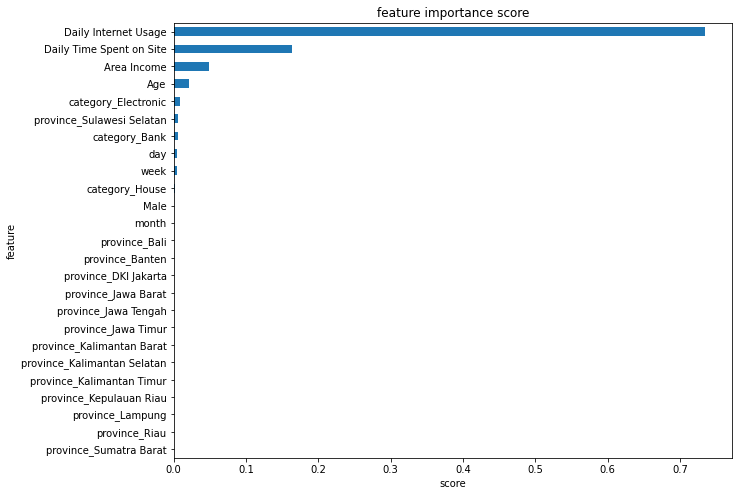

In [ ]:
show_feature_importance(DT2)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_over_SMOTE2,y_over_SMOTE2)

y_pred2 = rf2.predict(X_test2)
eval_classification(rf2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[138,   7],
       [  8, 147]])

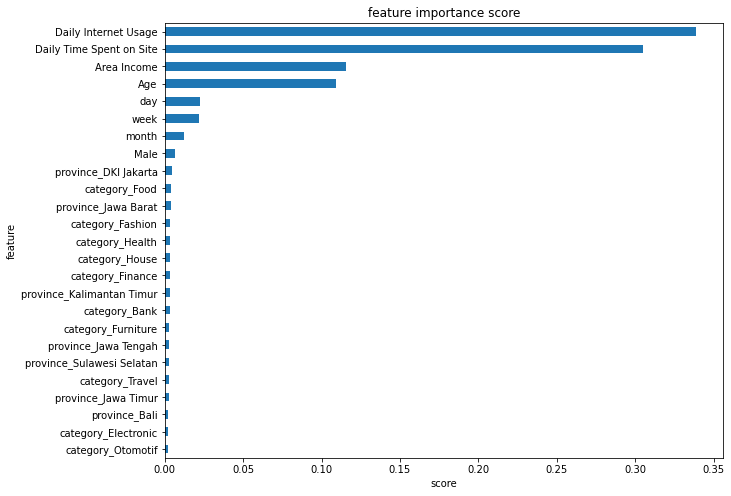

In [ ]:
show_feature_importance(rf2)

XGBOOST

In [ ]:
from xgboost import XGBClassifier
xg2 = XGBClassifier(random_state=42)
xg2.fit(X_over_SMOTE2, y_over_SMOTE2)

y_pred2 = xg2.predict(X_test2)
eval_classification(xg2, y_pred2, X_over_SMOTE2, y_over_SMOTE2, X_test2, y_test2)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95
AUC: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test2)

array([[139,   9],
       [  7, 145]])

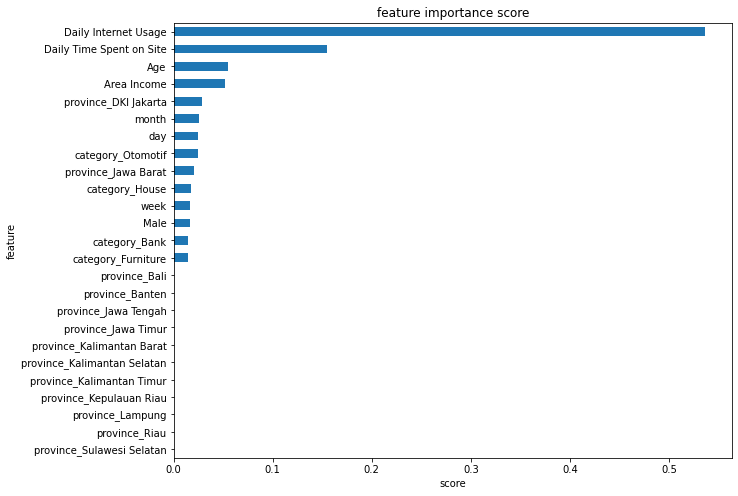

In [ ]:
show_feature_importance(xg2)

In [ ]:
df_model.head().T

,0,1,2,3,4
Daily Time Spent on Site,6.895000e+01,8.023000e+01,6.947000e+01,7.415000e+01,6.837000e+01
Age,3.500000e+01,3.100000e+01,2.600000e+01,2.900000e+01,3.500000e+01
Area Income,4.328373e+08,4.790930e+08,4.185016e+08,3.836433e+08,5.172299e+08
Daily Internet Usage,2.560900e+02,1.937700e+02,2.365000e+02,2.458900e+02,2.255800e+02
Male,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
Clicked on Ad,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
month,3.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00
week,1.200000e+01,1.400000e+01,1.000000e+01,1.000000e+00,2.200000e+01
day,2.700000e+01,4.000000e+00,1.300000e+01,1.000000e+01,3.000000e+00
province_Bali,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


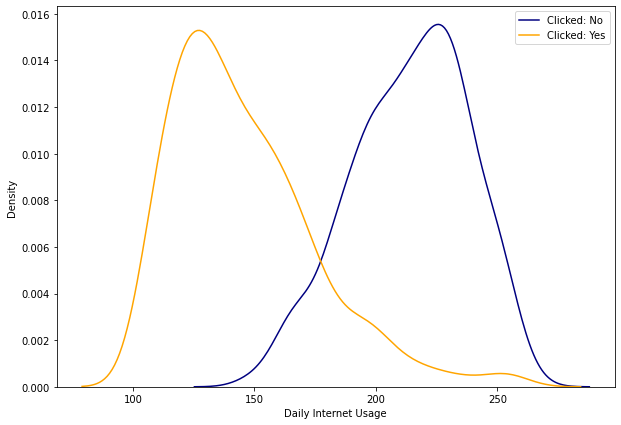

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_model[df_model['Clicked on Ad']==0]['Daily Internet Usage'].dropna(),color='navy',label='Clicked: No', ax=ax)
sns.kdeplot(df_model[df_model['Clicked on Ad']==1]['Daily Internet Usage'].dropna(),color='orange',label='Clicked: Yes', ax=ax)
plt.legend() ;

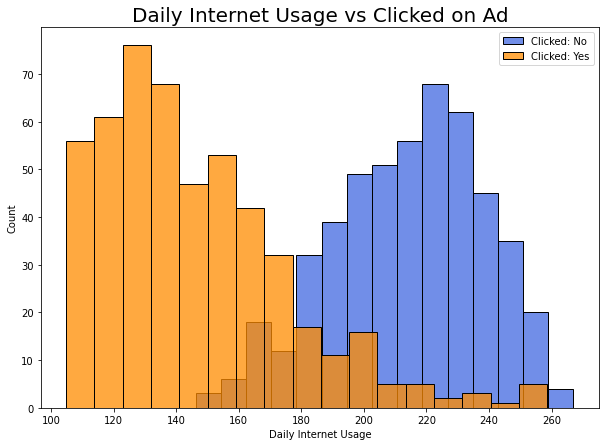

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_model[df_model['Clicked on Ad']==0]['Daily Internet Usage'].dropna(),color='royalblue',label='Clicked: No', ax=ax)
sns.histplot(df_model[df_model['Clicked on Ad']==1]['Daily Internet Usage'].dropna(),color='darkorange',label='Clicked: Yes', ax=ax)
plt.title('Daily Internet Usage vs Clicked on Ad', size = 20)
plt.legend() ;

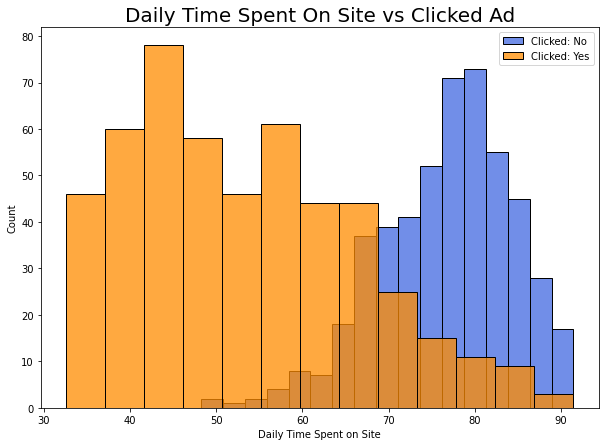

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_model[df_model['Clicked on Ad']==0]['Daily Time Spent on Site'].dropna(),color='royalblue',label='Clicked: No', ax=ax)
sns.histplot(df_model[df_model['Clicked on Ad']==1]['Daily Time Spent on Site'].dropna(),color='darkorange',label='Clicked: Yes', ax=ax)
plt.title('Daily Time Spent On Site vs Clicked Ad', size  = 20)
plt.legend() ;



*   Daily internet usage : Click Through rate tinggi ketika Daily internet usage rendah (optimum 110-170 min/day)

*   Daily time spent on site : CTR tinggi ketika Daily time spent on site rendah (optimum 35-65 min in a day)



